# [Lab Session 2](otsu.ipynb)

In [29]:
import numpy as np
import matplotlib.pyplot as plt

**[Task 1.1.]()** Load the image:

In [30]:
imgf = plt.imread("data/NIH3T3/im/dna-0.png")

**[Task 1.2.]()** Quantify the image into 256 bins:

In [31]:
img8 = (imgf * 255).round().astype(np.uint8)

**[Task 1.3.]()** Compute the image histogram:

In [32]:
h = []
for i in range(0,256):
    bool_img8 = img8 == i
    pixelcount = bool_img8.sum()
    h.append(pixelcount)

h = np.array(h)
    

Show the computed histogram:

<BarContainer object of 256 artists>

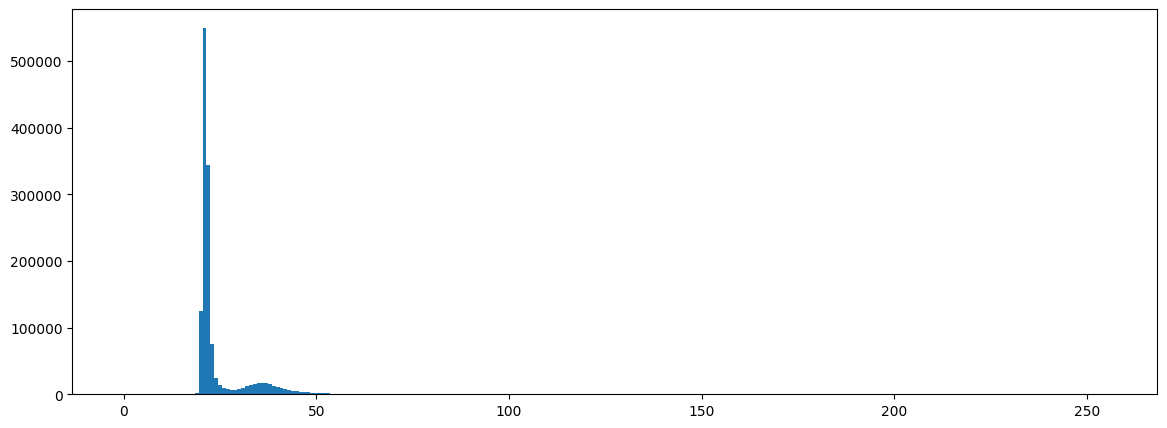

In [33]:
plt.figure(figsize=(14,5))
plt.bar(range(256), h, width=1)

**[Task 1.4.]()** Implement the method of Otsu:

In [34]:
sigma_b_squared_max = 0
threshold = 0
for T in range(1, 256):
    n1 = np.sum(h[0:T])
    n2 = np.sum(h[T:256])
    if n1 == 0 or n2 == 0:
        continue    
    mean1 = np.sum([i * h[i] for i in range(0, T)]) / n1 
    mean2 = np.sum([i * h[i] for i in range(T, 256)]) / n2
    sigma_b_squared = n1 * n2 * (mean1 - mean2) ** 2
 
    if sigma_b_squared > sigma_b_squared_max :
        sigma_b_squared_max = sigma_b_squared
        threshold = T 

print(threshold)



31


**[Task 1.5.]()** Perform Otsu thresholding:

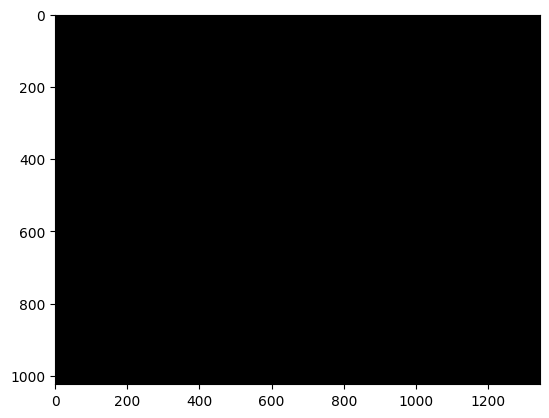

In [39]:
img8 = img8 > threshold * 0.01
plt.figure()
plt.imshow(img8, cmap='gray')

**[Task 1.6.]()** Compute the Dice coefficient:

In [ ]:
dice_score = 2 * np.sum(binary_img * GT) / (np.sum(binary_img) + np.sum(GT))
print("Dice score:", dice_score)